In [2]:
#https://stackoverflow.com/questions/54544285/is-it-possible-to-do-multivariate-multi-step-forecasting-using-fb-prophet

In [3]:
import pandas as pd
from fbprophet import Prophet

data = pd.read_csv('jour.csv')
data.head()

,Date/Time,Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep),TZ1 WORK:Zone Total Internal Total Heating Energy [J](TimeStep),TZ2 MISC:Zone Total Internal Total Heating Energy [J](TimeStep),TZ2 MISC:Zone People Occupant Count [](TimeStep),TZ1 WORK:Zone People Occupant Count [](TimeStep),TZ1 WORK:Zone Air Temperature [C](TimeStep),TZ1 WORK:Zone Air Relative Humidity [%](TimeStep),TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep),TZ2 MISC:Zone Air Temperature [C](TimeStep),TZ2 MISC:Zone Air Relative Humidity [%](TimeStep),TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep),Electricity:Facility [J](TimeStep)
0,01/01 00:15:00,5.525,0.0,0.0,0.0,0.0,9.770882,76.143094,5.0,9.829624,75.747286,5.0,399403.710026
1,01/01 00:30:00,4.650,0.0,0.0,0.0,0.0,9.411920,75.085988,5.0,9.477746,74.615388,5.0,399403.710026
2,01/01 00:45:00,3.775,0.0,0.0,0.0,0.0,8.889536,72.230596,5.0,9.109182,70.758718,5.0,588098.616136
3,01/01 01:00:00,2.900,0.0,0.0,0.0,0.0,8.520465,68.961290,5.0,8.981167,66.327177,5.0,955577.310287
4,01/01 01:15:00,3.250,0.0,0.0,0.0,0.0,8.361641,67.085830,5.0,8.923836,64.141290,5.0,744308.659475


In [4]:
data.dtypes

Date/Time                                                               object
Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)         float64
TZ1 WORK:Zone Total Internal Total Heating Energy [J](TimeStep)        float64
TZ2 MISC:Zone Total Internal Total Heating Energy [J](TimeStep)        float64
TZ2 MISC:Zone People Occupant Count [](TimeStep)                       float64
TZ1 WORK:Zone People Occupant Count [](TimeStep)                       float64
TZ1 WORK:Zone Air Temperature [C](TimeStep)                            float64
TZ1 WORK:Zone Air Relative Humidity [%](TimeStep)                      float64
TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)    float64
TZ2 MISC:Zone Air Temperature [C](TimeStep)                            float64
TZ2 MISC:Zone Air Relative Humidity [%](TimeStep)                      float64
TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)    float64
Electricity:Facility [J](TimeStep)                  

In [5]:
data_i=pd.DataFrame(data)
data_i['Date/Time']=data_i['Date/Time'].apply(lambda x : x.split(' ')[1]+'/2018 '+ x.split(' ')[3])
data_i['Date/Time']=data_i['Date/Time'].replace(['24:00:00'], '00:00:00')

In [6]:
df_final = data.reset_index()[['Date/Time', 'Electricity:Facility [J](TimeStep) ']].rename({'Date/Time' : 'ds',
                               'Electricity:Facility [J](TimeStep) ' : 'y'}, axis = 'columns')
df_final['Date/Time']=df_final['ds'].replace(['24:00:00'], '00:00:00')
df_final['ds'] = pd.to_datetime(df_final['ds'],format='%d/%m/%Y %H:%M:%S', errors = 'coerce')


In [7]:
df_final['ds'] 

0     2018-01-01 00:15:00
1     2018-01-01 00:30:00
2     2018-01-01 00:45:00
3     2018-01-01 01:00:00
4     2018-01-01 01:15:00
              ...        
187   2018-02-01 23:00:00
188   2018-02-01 23:15:00
189   2018-02-01 23:30:00
190   2018-02-01 23:45:00
191                   NaT
Name: ds, Length: 192, dtype: datetime64[ns]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     ds
0   2018-01-01 00:15:00
1   2018-01-01 00:30:00
2   2018-01-01 00:45:00
3   2018-01-01 01:00:00
4   2018-01-01 01:15:00
..                  ...
186 2018-02-01 23:00:00
187 2018-02-01 23:15:00
188 2018-02-01 23:30:00
189 2018-02-01 23:45:00
190 2018-02-02 23:45:00

[191 rows x 1 columns]


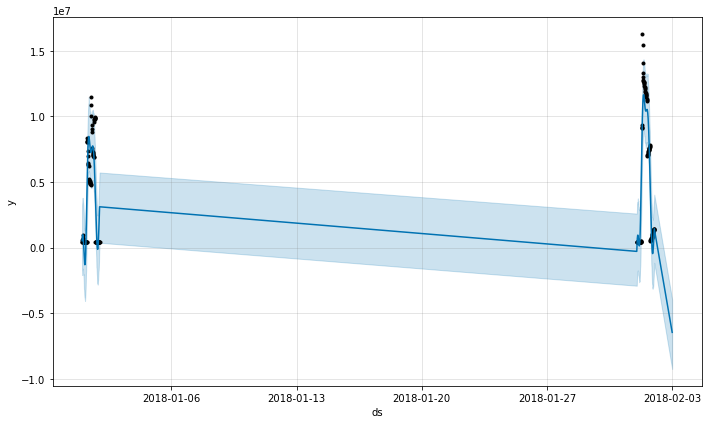

In [11]:
period_in_hours = 24 # Heure * Nb de jours
m = Prophet().fit(df_final.dropna())
future = m.make_future_dataframe(periods=1 , freq='D')
print(futureture)
fcst = m.predict(future)
fig = m.plot(fcst)


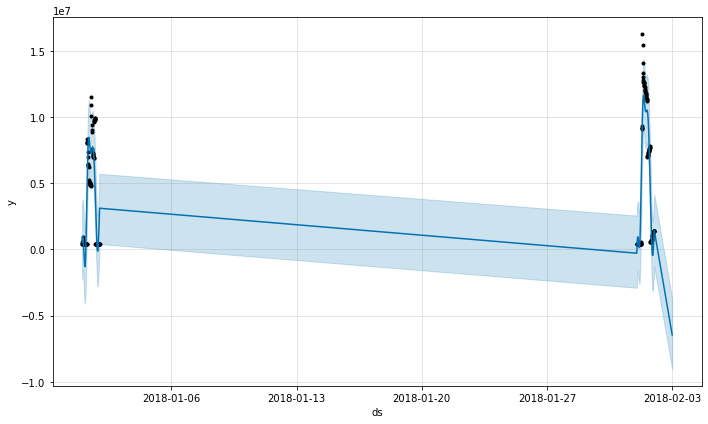

In [9]:
fcst = m.predict(future)
fig = m.plot(fcst)

In [10]:
fig = px.line(data_i.interpolate(), x = 'Date/Time', y = 'Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)', title='Outdoor Temperature missing value correction')
fig.update_traces(name='Temp/miss_val', showlegend = True)

NameError: name 'px' is not defined

In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
fig2 = m.plot_components(forecast)


In [ ]:
m = Prophet(yearly_seasonality=True)

In [ ]:
m.fit(df_final.dropna())

In [ ]:
future = m.make_future_dataframe(periods=14)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


In [ ]:
fig1 = m.plot(forecast)